In [ ]:
pip install --upgrade pip

In [1]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 922.6 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.1.5
    Uninstalling typeguard-4.1.5:
      Successfully uninstalled typeguard-4.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.
ydata-profiling 4.6.4 requires typeguard<5,>=4.1.2, but you have typeguard 2.13.3 which is incompatible.


In [2]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.1.1
    Uninstalling keras-3.1.1:
      Successfully uninstalled keras-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [5]:
!pip install numpy==1.25
!pip install typeguard==4.1.2

2024-04-10 17:23:32.573314: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 17:23:32.573441: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 17:23:32.732095: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


check


In [1]:
import os
import itertools
from PIL import Image

In [57]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam, Adamax

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
# Get Paths of Training and testing directories

Training = '/kaggle/input/brain-tumor-mri-dataset/Training'

# Create two lists to store paths of images and their labels

imgpaths = []
labels =[]


# Convert directories to lists

tr_dir = os.listdir(Training)

In [61]:

for i in tr_dir:
    classpath = os.path.join(Training, i)
    imglist = os.listdir(classpath)
    
    for img in imglist:
        imgpath = os.path.join(classpath, img)
        
        imgpaths.append(imgpath)
        labels.append(i)

In [62]:

Paths = pd.Series(imgpaths, name = 'Paths')
Labels = pd.Series(labels, name = 'Labels')

# Concatenate them in one Dataframe called Tr_data

Tr_data = pd.concat([Paths, Labels], axis = 1)

In [63]:

Testing = '/kaggle/input/brain-tumor-mri-dataset/Testing'


# Create two lists to store paths of images and their labels

imgpaths = []
labels =[]


# Convert directories to lists

ts_dir = os.listdir(Testing)

In [64]:
for i in ts_dir:
    classpath = os.path.join(Testing, i)
    imglist = os.listdir(classpath)
    
    for img in imglist:
        imgpath = os.path.join(classpath, img)
        
        imgpaths.append(imgpath)
        labels.append(i)

In [65]:
Paths = pd.Series(imgpaths, name = 'Paths')
Labels = pd.Series(labels, name = 'Labels')

# Concatenate them in one Dataframe called Tr_data

Ts_data = pd.concat([Paths, Labels], axis = 1)

In [66]:
Tr_data.shape

(5712, 2)

In [67]:
Tr_data.head()

,Paths,Labels
0,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary


In [68]:
Ts_data.shape

(1311, 2)

In [69]:
Ts_data.head()

,Paths,Labels
0,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary


In [70]:
valid_df, test_df = train_test_split(Ts_data, train_size = 0.5, shuffle = True, random_state = 123)
print(valid_df.shape)
print(test_df.shape)

(655, 2)
(656, 2)


In [71]:

batch_size = 20
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)


#Create generators

Tr_G = ImageDataGenerator(fill_mode='nearest')

Val_G = ImageDataGenerator()

Test_G = ImageDataGenerator()

In [72]:
Train = Tr_G.flow_from_dataframe(Tr_data, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)

Found 5712 validated image filenames belonging to 4 classes.


In [73]:
Valid = Val_G.flow_from_dataframe(valid_df, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)

Found 655 validated image filenames belonging to 4 classes.


In [74]:
Test = Test_G.flow_from_dataframe(test_df, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = False, batch_size = batch_size)

Found 656 validated image filenames belonging to 4 classes.


In [75]:
L_index = Train.class_indices
L_index

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [76]:
Keys = list(L_index.keys())
Keys

['glioma', 'meningioma', 'notumor', 'pituitary']

In [77]:
imgs, labels = next(Train)

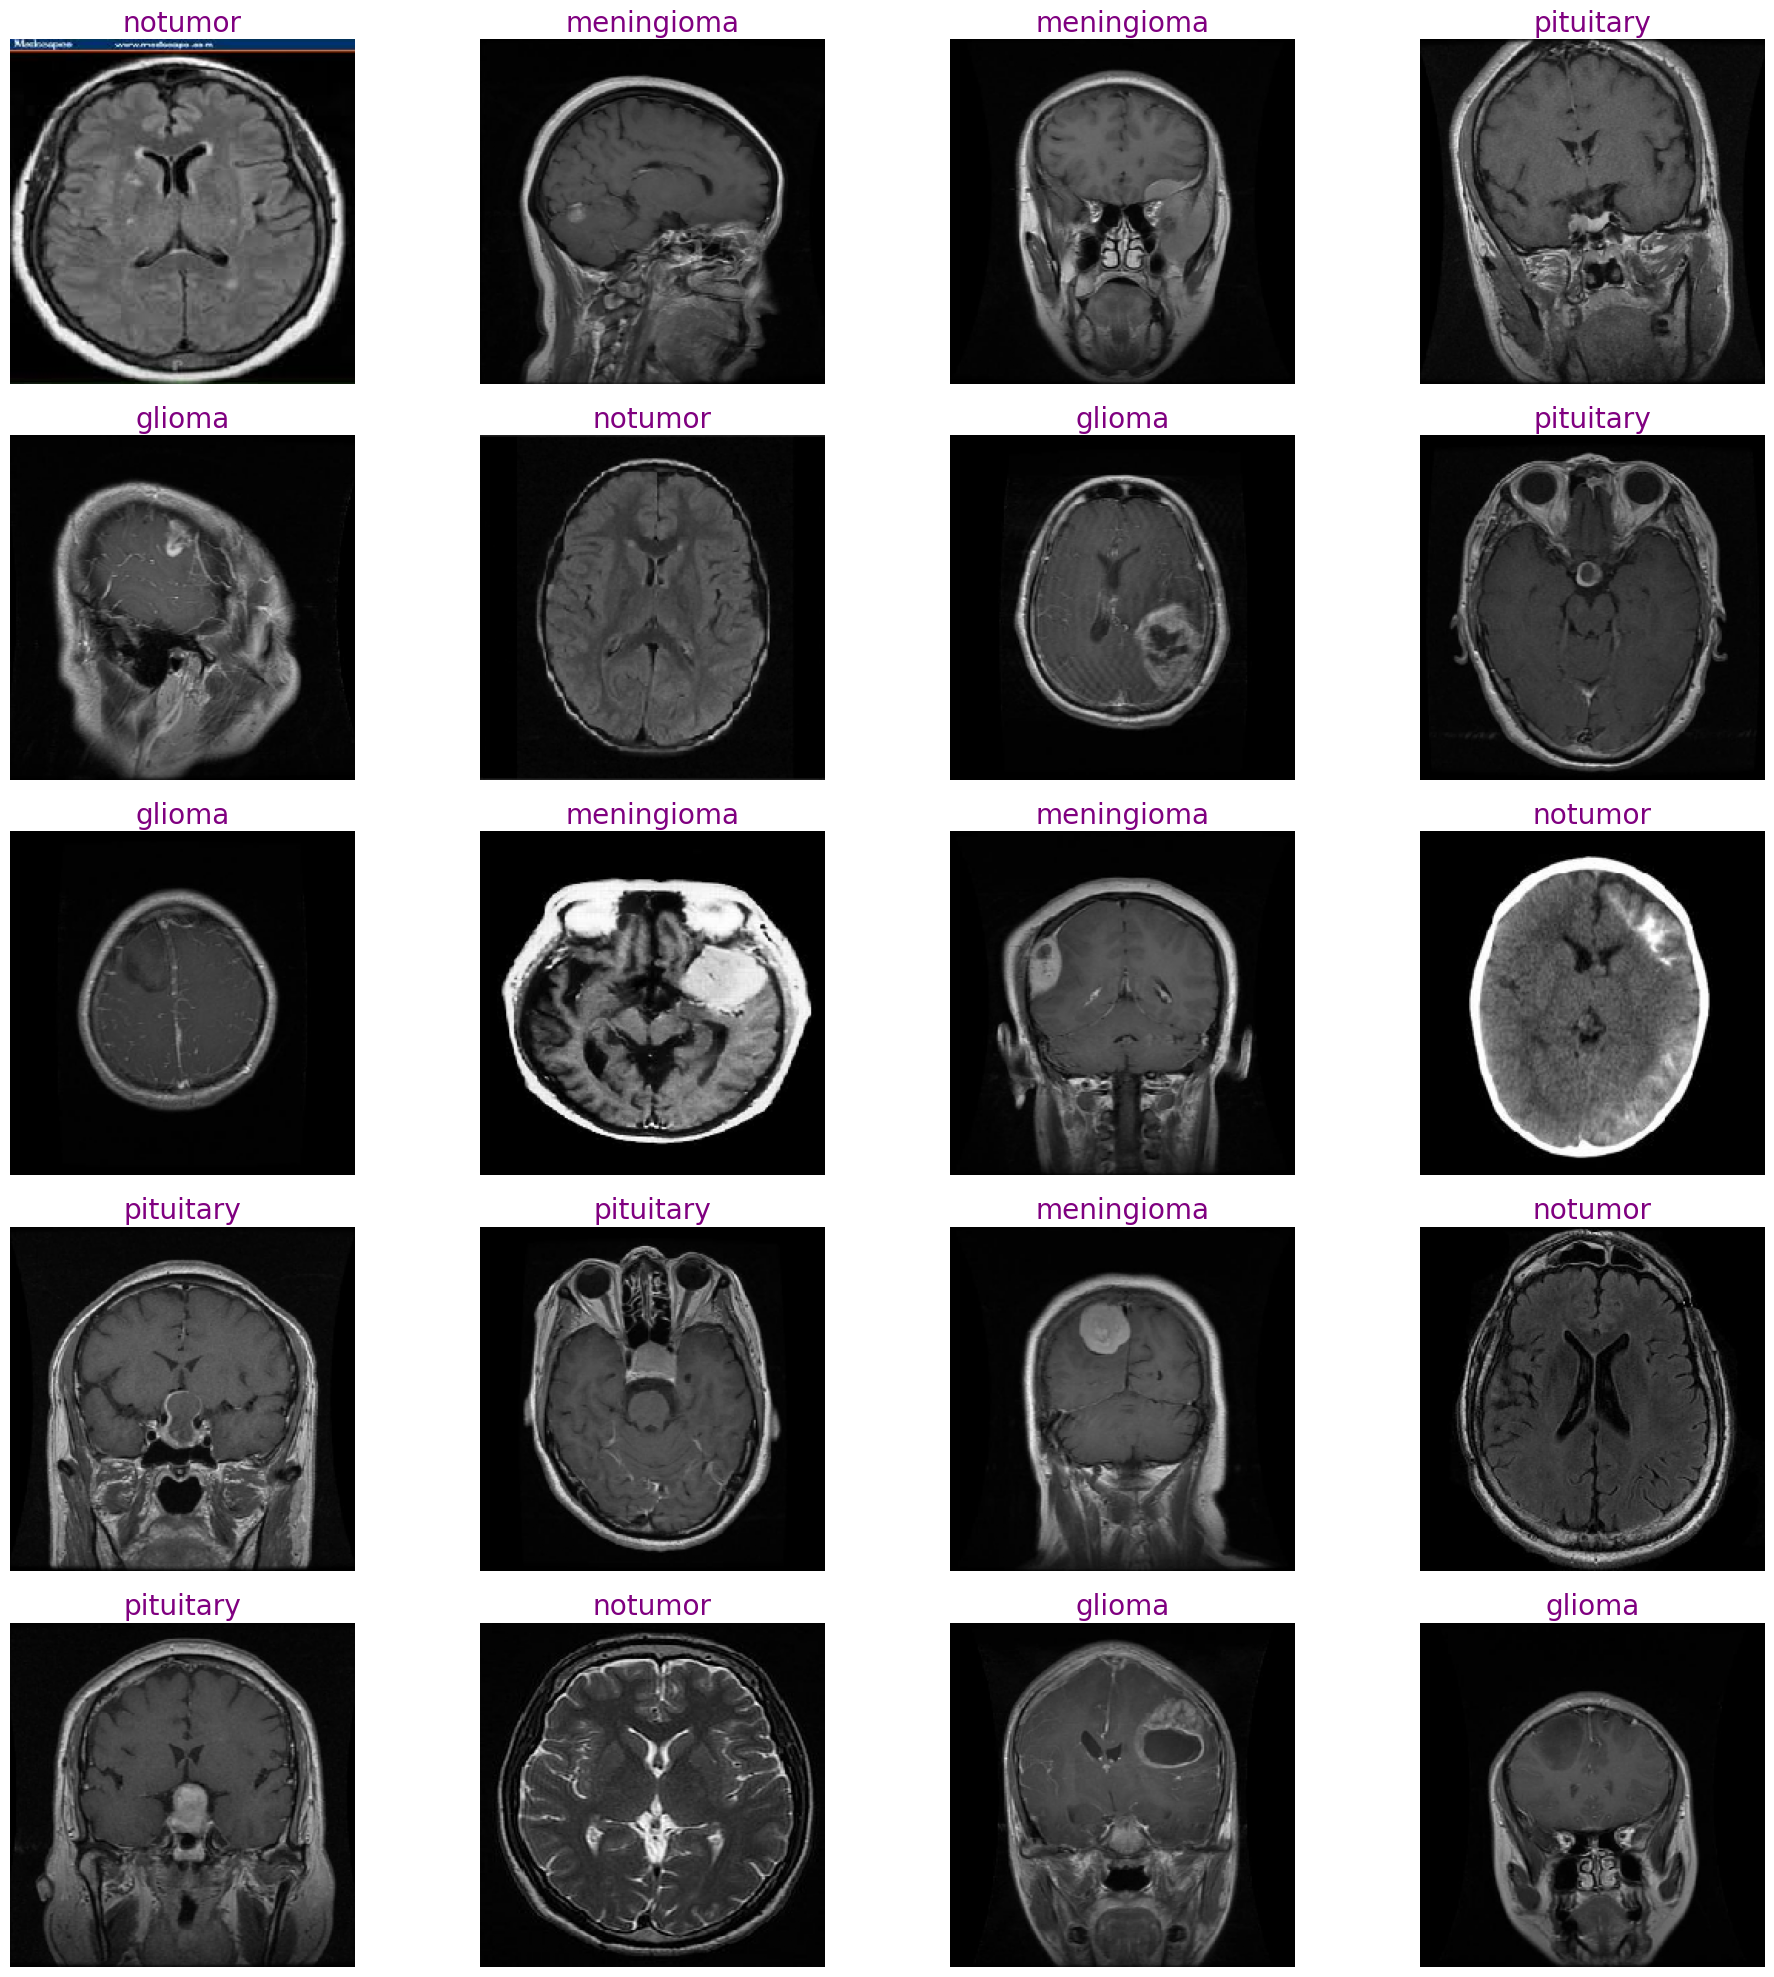

In [78]:
plt.figure(figsize= (20, 20))

for i in range(20):
    plt.subplot(5, 4, i +1)
    im = imgs[i]/255
    plt.imshow(im)
    
    #Labelling
    index = np.argmax(labels[i])
    label = Keys[index]
    plt.title(label, color = 'purple')
    plt.axis('off')
    
plt.tight_layout()    
plt.show()


In [79]:
Train


In [80]:
# Define number of classes 
counter_classes = len(list(Train.class_indices.keys()))
counter_classes

4

In [81]:
CNN = Sequential([
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu', input_shape = img_shape),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),
    
    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),
     Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),
    
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),
    
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    
    Dense(256, activation = 'elu'),
    Dense(128, activation = 'elu'),
    Dense(64, activation = 'elu'),
    Dense(32, activation = 'elu'),
    Dense(counter_classes, activation = 'softmax')
])

In [82]:
CNN.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [83]:
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 224, 224, 128)     3584      
                                                                 
 conv2d_12 (Conv2D)          (None, 224, 224, 128)     147584    
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 128)     147584    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 112, 112, 256)     295168    
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 256)     590080    
                                                      

In [84]:
Train


In [85]:
epochs = 12

history = CNN.fit(x = Train, epochs = epochs, verbose = 1, validation_data = Valid, shuffle = False)

Epoch 1/12
286/286 [==============================] - 202s 695ms/step - loss: 0.6896 - accuracy: 0.7537 - val_loss: 0.5787 - val_accuracy: 0.7634
Epoch 2/12
286/286 [==============================] - 198s 692ms/step - loss: 0.3517 - accuracy: 0.8704 - val_loss: 0.5415 - val_accuracy: 0.8168
Epoch 3/12
286/286 [==============================] - 198s 691ms/step - loss: 0.3114 - accuracy: 0.8885 - val_loss: 0.3573 - val_accuracy: 0.8870
Epoch 4/12
286/286 [==============================] - 198s 693ms/step - loss: 0.2163 - accuracy: 0.9205 - val_loss: 0.3556 - val_accuracy: 0.8779
Epoch 5/12
286/286 [==============================] - 198s 691ms/step - loss: 0.2041 - accuracy: 0.9273 - val_loss: 0.3092 - val_accuracy: 0.8916
Epoch 6/12
286/286 [==============================] - 197s 690ms/step - loss: 0.1780 - accuracy: 0.9373 - val_loss: 0.3009 - val_accuracy: 0.8931
Epoch 7/12
286/286 [==============================] - 198s 691ms/step - loss: 0.1393 - accuracy: 0.9505 - val_loss: 0.2288 -

In [86]:

tr_acc = history.history['accuracy']
tr_loss = history.history['loss']


# accuracy and loss or Valid\

v_acc = history.history['val_accuracy']
v_loss = history.history['val_loss']


# highest value of v_acc by getting its index

index_acc = np.argmax(v_acc)
high_Vacc = v_acc[index_acc]

index_loss = np.argmin(v_loss)
low_Vloss = v_loss[index_loss]


# n. of epochs based on length of tr_acc values

Epochs =[]
for i in range(len(tr_acc)):
    Epochs.append (i+1)

best_acc = f'Best epoch ={str(index_acc +1)}'
best_loss = f'Best epoch ={str(index_loss+1)}'

In [87]:
# check Epochs and tr_acc
print(Epochs)
print(tr_acc)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0.7536764740943909, 0.8704481720924377, 0.8884803652763367, 0.9205182194709778, 0.9273459315299988, 0.9373249411582947, 0.9504551887512207, 0.9522058963775635, 0.9690126180648804, 0.9723389148712158, 0.981267511844635, 0.9831932783126831]


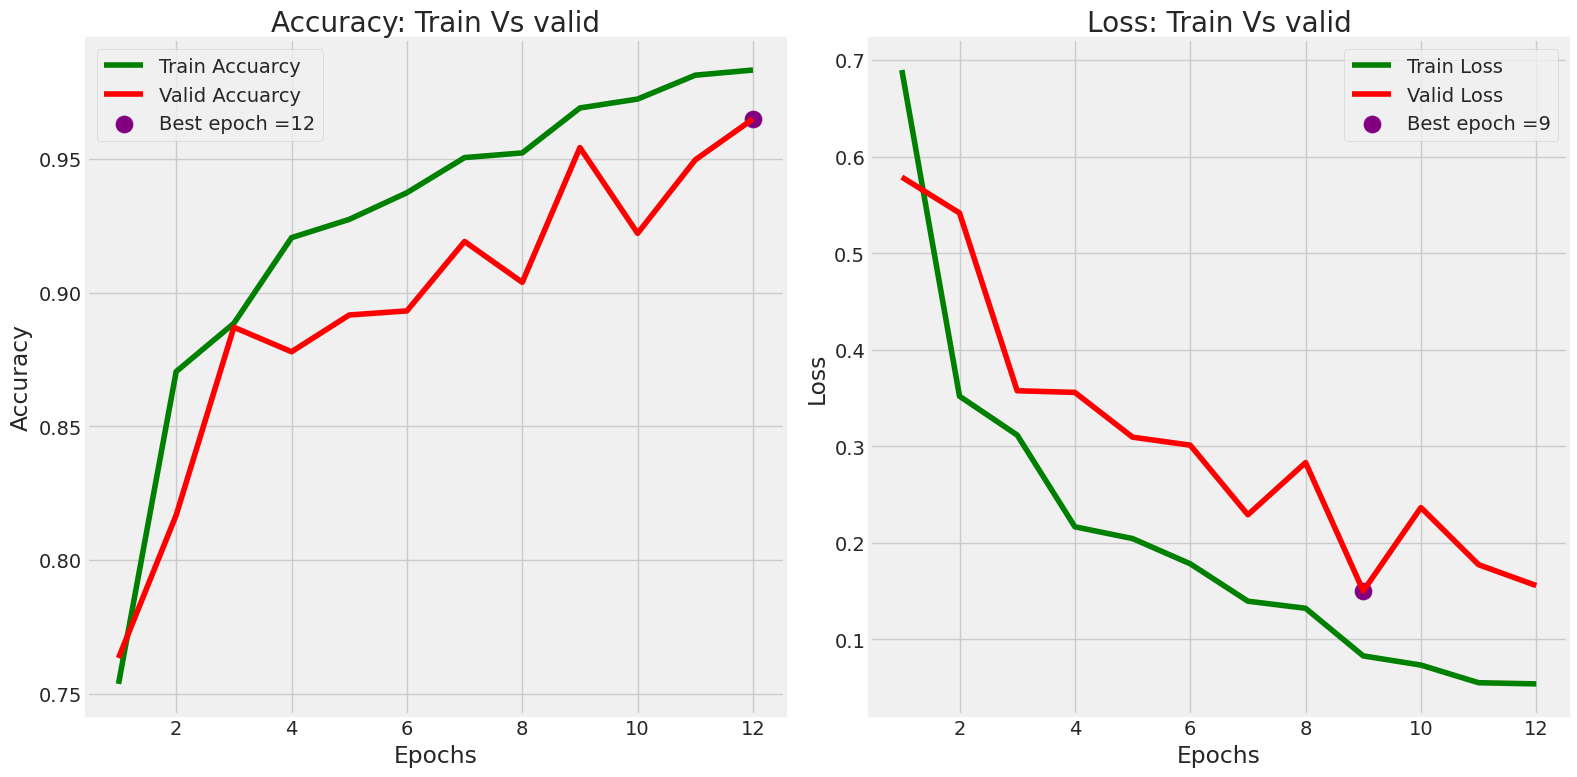

In [88]:
plt.figure(figsize = (16, 8))
plt.style.use('fivethirtyeight')


plt.subplot(1,2,1)
plt.plot(Epochs, tr_acc, "g", label = "Train Accuarcy")
plt.plot(Epochs, v_acc, "r", label = "Valid Accuarcy")
plt.scatter(index_acc+1, high_Vacc, s= 150, color = 'purple', label = best_acc)

plt.title("Accuracy: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(Epochs, tr_loss, "g", label = "Train Loss")
plt.plot(Epochs, v_loss, "r", label = "Valid Loss")
plt.scatter(index_loss+1, low_Vloss, s= 150, color = 'purple', label = best_loss)

plt.title("Loss: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [89]:
Train_sc = CNN.evaluate(Train, verbose = 0)
Valid_sc = CNN.evaluate(Valid, verbose = 0)
Test_sc =CNN.evaluate(Test, verbose = 0)

#Print
print('Train Scores : \n    accuracy:', Train_sc[1], '\n      Loss: ', Train_sc[0], '\n________________________')
print('Valid Scores : \n    accuracy:', Valid_sc[1], '\n      Loss: ', Valid_sc[0], '\n________________________')
print('Test Scores : \n    accuracy:', Test_sc[1], '\n      Loss: ', Test_sc[0], '\n________________________')

Train Scores : 
    accuracy: 0.9942227005958557 
      Loss:  0.0188438780605793 
________________________
Valid Scores : 
    accuracy: 0.9648854732513428 
      Loss:  0.15542320907115936 
________________________
Test Scores : 
    accuracy: 0.9618902206420898 
      Loss:  0.11807296425104141 
________________________


In [90]:
predictions = CNN.predict_generator(Test)
y_pred = np.argmax(predictions, axis = 1)

#Chack
print(predictions)
print(y_pred)

[[5.4988126e-05 9.8075951e-04 9.9896216e-01 2.0001612e-06]
 [1.7367515e-03 9.9825269e-01 1.0428799e-05 2.0870581e-07]
 [1.0000000e+00 3.3908185e-11 1.9996274e-11 1.2271715e-15]
 ...
 [9.5383978e-01 5.2339252e-04 6.4591467e-03 3.9177716e-02]
 [6.0362041e-08 1.0038256e-05 9.5584164e-07 9.9998891e-01]
 [2.2187156e-03 9.9763691e-01 1.0967895e-04 3.4736815e-05]]
[2 1 0 3 2 1 1 0 2 0 0 2 1 1 1 1 2 0 0 2 0 1 3 3 0 2 3 1 3 2 3 3 2 2 1 3 0
 1 1 3 3 2 2 0 1 1 1 2 2 0 3 2 2 1 3 1 2 0 3 2 1 0 2 2 2 0 1 2 0 2 3 1 3 0
 0 3 2 2 0 1 1 2 2 2 1 3 1 3 1 2 0 3 1 3 1 1 1 1 2 2 3 2 2 0 1 2 3 1 2 2 3
 1 0 3 2 0 2 1 0 1 0 2 1 2 3 2 0 3 3 2 3 1 3 2 1 3 0 1 1 0 2 2 3 1 3 0 1 0
 1 1 3 3 1 2 2 3 2 2 2 3 0 3 2 3 1 1 0 0 3 3 3 3 0 3 3 2 3 1 0 0 0 3 3 3 1
 1 3 3 2 3 0 3 1 0 2 2 3 3 3 2 3 2 0 2 0 3 3 2 3 3 1 1 3 2 2 3 2 2 2 1 3 1
 2 2 0 2 3 0 3 1 0 1 0 2 0 2 1 3 2 2 0 2 2 3 3 1 2 1 2 2 0 2 1 1 1 1 0 3 2
 3 2 3 1 1 1 0 1 2 0 0 3 3 2 3 0 2 2 2 0 0 1 1 1 2 1 0 0 3 1 0 2 3 1 1 2 3
 0 2 1 0 0 2 1 2 0 2 3 1 2 0 0 2 1 1 2 2

In [91]:
Test_cl_ind = Test.class_indices
 
# Get Keys
classes = list(Test_cl_ind.keys())

#CM
cm = confusion_matrix(Test.classes, y_pred)
cm

array([[132,  17,   0,   0],
       [  3, 135,   3,   2],
       [  0,   0, 200,   0],
       [  0,   0,   0, 164]])

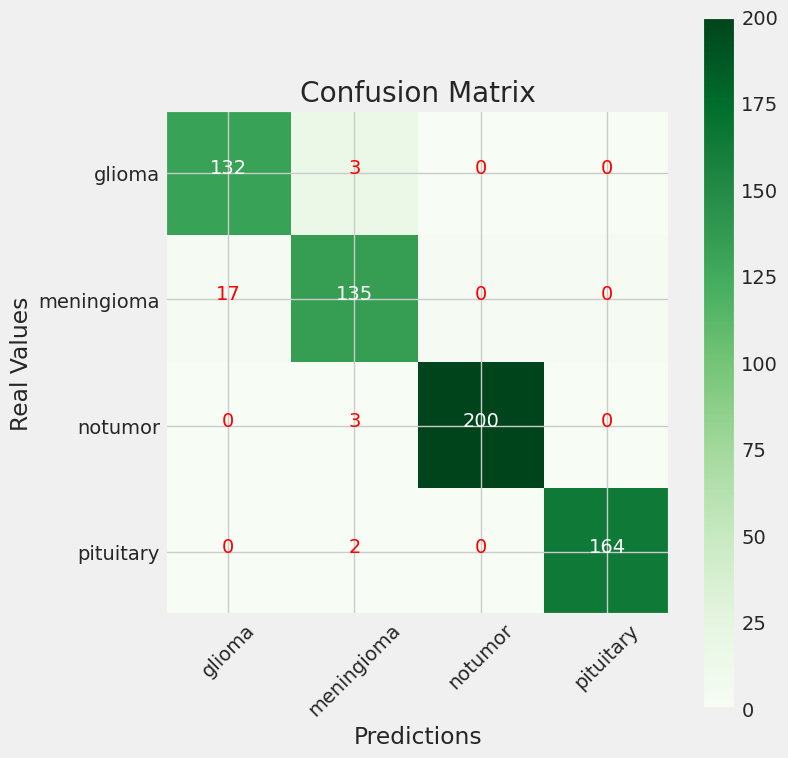

In [92]:
#visualise it
plt.figure(figsize =(8, 8))
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,rotation = 45)
plt.yticks(tick_marks, classes)

thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(i, j, cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh  else 'red')
    
plt.tight_layout()
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.show()

In [93]:
print(classification_report(Test.classes, y_pred, target_names = classes))

              precision    recall  f1-score   support

      glioma       0.98      0.89      0.93       149
  meningioma       0.89      0.94      0.92       143
     notumor       0.99      1.00      0.99       200
   pituitary       0.99      1.00      0.99       164

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



In [94]:
CNN.save('f1.h5')

In [95]:
CNN = tf.keras.models.load_model("/kaggle/working/f1.h5", compile = False)
CNN.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [99]:
from PIL import Image
import numpy as np
import tensorflow as tf

path = '/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma/Te-meTr_0009.jpg'

# open image
img = Image.open(path)

# Preprocess
img1 = img.resize((224, 224))
iArray = tf.keras.preprocessing.image.img_to_array(img1)
iArray = tf.expand_dims(iArray, 0)

# Assuming CNN is your pre-trained model
# Predictions ratio for each class
p = CNN.predict(iArray)

# Get score:
score = tf.nn.softmax(p[0])
print('\nPredictions of given image:  \n\n', score)

# Define class labels
cl_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Get class whose max ratio
max_class_index = np.argmax(p)
print(f'-------------------------\nClass whose max ratio: \n\n{cl_labels[max_class_index]}')

# Or simply print the class name
print(cl_labels[max_class_index])


1/1 [==============================] - 0s 20ms/step

Predictions of given image:  

 tf.Tensor([0.175094   0.4740056  0.1758083  0.17509216], shape=(4,), dtype=float32)
-------------------------
Class whose max ratio: 

meningioma
meningioma


1/1 [==============================] - 0s 19ms/step


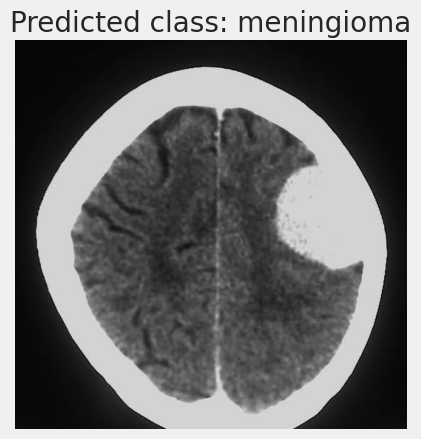


Predictions of given image:  

 tf.Tensor([0.175094   0.4740056  0.1758083  0.17509216], shape=(4,), dtype=float32)
meningioma


In [102]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt  # Import for image display

path = '/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma/Te-meTr_0009.jpg'

# Open and preprocess image
img = Image.open(path)
img1 = img.resize((224, 224))
iArray = tf.keras.preprocessing.image.img_to_array(img1)
iArray = tf.expand_dims(iArray, 0)

# Make predictions
p = CNN.predict(iArray)
score = tf.nn.softmax(p[0])
max_class_index = np.argmax(p)
predicted_class = cl_labels[max_class_index]

# Display image with title using matplotlib
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()



1/1 [==============================] - 0s 20ms/step


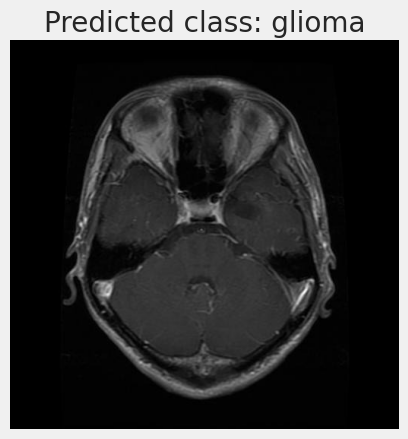

In [103]:
path = '/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-glTr_0001.jpg'

# Open and preprocess image
img = Image.open(path)
img1 = img.resize((224, 224))
iArray = tf.keras.preprocessing.image.img_to_array(img1)
iArray = tf.expand_dims(iArray, 0)

# Make predictions
p = CNN.predict(iArray)
score = tf.nn.softmax(p[0])
max_class_index = np.argmax(p)
predicted_class = cl_labels[max_class_index]

# Display image with title using matplotlib
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()



1/1 [==============================] - 0s 20ms/step


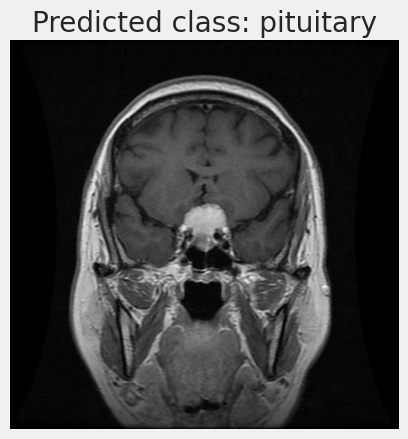

In [104]:
path = '/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-piTr_0002.jpg'

# Open and preprocess image
img = Image.open(path)
img1 = img.resize((224, 224))
iArray = tf.keras.preprocessing.image.img_to_array(img1)
iArray = tf.expand_dims(iArray, 0)

# Make predictions
p = CNN.predict(iArray)
score = tf.nn.softmax(p[0])
max_class_index = np.argmax(p)
predicted_class = cl_labels[max_class_index]

# Display image with title using matplotlib
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()



1/1 [==============================] - 0s 23ms/step


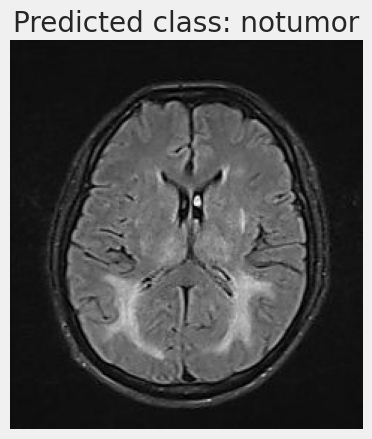

In [105]:
path = '/kaggle/input/brain-tumor-mri-dataset/Testing/notumor/Te-noTr_0001.jpg'

# Open and preprocess image
img = Image.open(path)
img1 = img.resize((224, 224))
iArray = tf.keras.preprocessing.image.img_to_array(img1)
iArray = tf.expand_dims(iArray, 0)

# Make predictions
p = CNN.predict(iArray)
score = tf.nn.softmax(p[0])
max_class_index = np.argmax(p)
predicted_class = cl_labels[max_class_index]

# Display image with title using matplotlib
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()

